# Visialization the data

 ## Import
 

In [1]:
%matplotlib inline 
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from skimage.feature import daisy
import matplotlib.pyplot as plt
import numpy as np

from skimage import feature, exposure

## Read Data

In [2]:
train_label = 'train_max_y.csv'
train_data = 'train_max_x'
test_data = 'test_max_x'

In [3]:
X_train =pd.read_pickle('train_max_x')
#X_test = pd.read_pickle('test_max_x')

[[144. 153. 161. ...  58.  62.  67.]
 [144. 152. 160. ...  51.  59.  64.]
 [143. 151. 158. ...  46.  57.  62.]
 ...
 [160. 176. 172. ... 155. 163. 162.]
 [161. 167. 172. ... 147. 153. 154.]
 [156. 163. 168. ... 142. 147. 149.]]


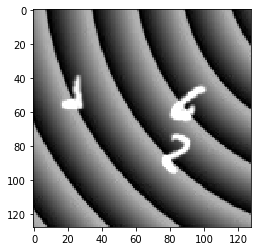

[[ 50.  51.  50. ...  50.  51.  53.]
 [ 50.  47.  50. ...  50.  47.  49.]
 [ 44.  48.  49. ...  62.  54.  46.]
 ...
 [ 53.  45.  57. ...  36.  41.  36.]
 [ 50.  58.  54. ...  38.  42.  35.]
 [ 63. 124.  80. ...  42.  38.  46.]]


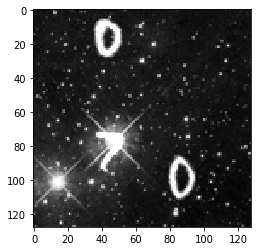

[[166. 172. 187. ... 146. 152. 158.]
 [176. 181. 188. ... 148. 148. 152.]
 [185. 187. 183. ... 153. 149. 155.]
 ...
 [163. 154. 132. ... 147. 147. 143.]
 [144. 134. 134. ... 143. 152. 157.]
 [141. 136. 138. ... 158. 157. 151.]]


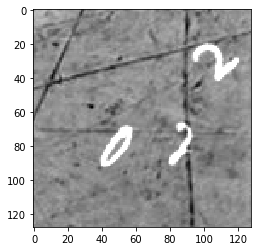

[[160. 126. 126. ... 211. 197. 169.]
 [195. 169. 151. ... 188. 184. 225.]
 [141. 129. 165. ... 159. 101. 185.]
 ...
 [133. 113. 103. ... 139. 128. 161.]
 [111. 164. 141. ... 182. 172. 163.]
 [114. 162. 162. ... 120. 147. 118.]]


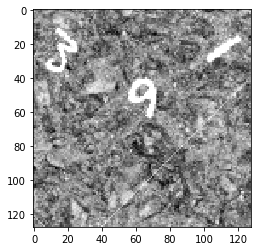

[[121. 125. 152. ... 111. 110. 107.]
 [ 92. 100. 113. ... 102.  87.  79.]
 [ 62.  66.  60. ...  90.  86.  83.]
 ...
 [ 51.  46.  37. ...  56.  57.  60.]
 [ 48.  46.  42. ...  49.  52.  55.]
 [ 51.  48.  53. ...  51.  48.  44.]]


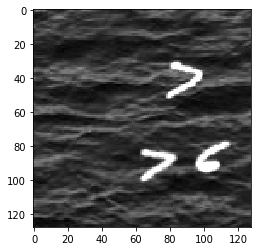

In [4]:
plt.gray()
for i in range(5):
    plt.imshow(X_train[i])
    print(X_train[i])
    plt.show()

In [4]:
y_train = pd.read_csv(train_label,encoding='utf-8')['Label']

In [5]:
print(X_train.shape)
print(y_train.shape)


(50000, 128, 128)
(50000,)


# Linear model 

## Feaeture extractor

In [6]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

class feature_extraction():
    
    def split(self, features_set, target_set, ratio):
        X_train, X_test, y_train, y_test = train_test_split(features_set, target_set, train_size=ratio,
                                                        test_size=1 - ratio,random_state=0)
        return X_train, X_test, y_train, y_test
    def hog(self, images, test_images):
        hog_image = []
        for i in range(len(images)):
            #print(images[i].shape)
            image, st= (feature.hog(images[i], orientations=9, pixels_per_cell=(20, 20),
                                       cells_per_block=(7, 7), visualize=True))
            #plt.imshow(image)
            #print(st)
            hog_image.append(st.flatten())
        #plt.imshow(image)
        hog_test_image = []
        for i in range(len(test_images)):
            image, st= (feature.hog(test_images[i], orientations=9, pixels_per_cell=(20, 20),
                                       cells_per_block=(7, 7), visualize=True))
            
            hog_test_image.append(st.flatten())
            
        return hog_image,hog_test_image
    
    def LBP(self,images, test_images):
        lbp_image = []
        for i in range(len(images)):
            image= feature.local_binary_pattern(images[i],R = 2 ,P=8, method="uniform" ).flatten()
            lbp_image.append( image)
        #plt.imshow(image)
        lbp_test_image = []
        for i in range(len(test_images)):
            lbp_test_image.append( (feature.local_binary_pattern(test_images[i],R=2,P=8,method="uniform" )).flatten())
        return lbp_image, lbp_test_image
    
    def raw(self,images, test_images):
        raw_image = []
        for i in range(len(images)):
            image= images[i]
            raw_image.append(image.flatten())
        #plt.imshow(image)
        raw_test_image = []
        for i in range(len(test_images)):
            image =test_images[i]
            raw_test_image.append(image.flatten())
        return raw_image, raw_test_image

In [7]:
X_train, X_test, y_train, y_test= feature_extraction().split(X_train,y_train,0.8)

In [9]:
fe= feature_extraction()

In [45]:
lbp_image, lbp_test_image = fe.LBP(X_train,X_test)

In [131]:
hog_image,hog_test_image = fe.hog(X_train,X_test)

In [10]:
raw_image, raw_test_image = fe.raw(X_train,X_test)

In [11]:
print(len(raw_image))
print(len(raw_test_image))

40000
10000


## Classifier

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.dummy import DummyClassifier
class classifier:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def logistic(self, c, epochs):
        model = LogisticRegression(C=c, dual=False, solver='saga', multi_class='multinomial', max_iter=epochs)
        model.fit(self.x_train, self.y_train)
        preds = model.predict(self.x_test)
        #scores3 = cross_val_score(model, self.x_train, self.y_train, cv=5, scoring='accuracy')
        #print("Score of logistic", scores3.mean() * 100)
        print("Score of logistic", metrics.accuracy_score(self.y_test, preds))
        
        return preds

    def svm(self, c):
        # n_estimators = 10
        model = LinearSVC(C=c, class_weight='balanced')
        print("start fitting")
        model.fit(self.x_train, self.y_train)
        preds = model.predict(self.x_test)
        #scores3 = cross_val_score(model, self.x_train, self.y_train, cv=5, scoring='accuracy')
        #print("Score of svm", scores3.mean() * 100)
        print("Score of svm", metrics.accuracy_score(self.y_test, preds))
        return preds

    def KNeighbors(self, iter):
        model = KNeighborsClassifier(n_neighbors=iter, weights='uniform', algorithm='auto', n_jobs=-1)
        model.fit(self.x_train, self.y_train)
        predict = model.predict(self.x_test)
        print(" kneighbors Regression : accurancy_is", metrics.accuracy_score(self.y_test, predict))
        return predict
    def dummy(self):
        clf = DummyClassifier(strategy='stratified', random_state=0)
        clf.fit(self.x_train, self.y_train)
        score = clf.score(self.x_test, self.y_test)
        print("Random Baseline's accurancy", score)

## Application of PCA

In [47]:
pca = PCA(n_components=1000)

In [48]:
lbp_image_pca = pca.fit_transform(lbp_image)

In [49]:
lbp_test_image_pca = pca.transform(lbp_test_image)

In [50]:
pca1 = PCA(n_components=1000)

In [132]:
hog_image_pca = pca1.fit_transform(hog_image)

In [133]:
hog_test_image_pca = pca1.transform(hog_test_image)

In [38]:
clf_lbp = classifier(lbp_image_pca, lbp_test_image_pca, y_train, y_test)

In [134]:
clf_hog = classifier(hog_image_pca, hog_test_image_pca, y_train, y_test)

In [13]:
pca2 = PCA(n_components=1000)

In [14]:
raw_image_pca = pca2.fit_transform(raw_image)

In [15]:
raw_test_image_pca = pca2.transform(raw_test_image)

In [16]:
clf_raw = classifier(raw_image_pca, raw_test_image_pca, y_train, y_test)

In [ ]:
print("LBP result")
clf_lbp.logistic(0.1,200)
clf_lbp.svm(0.1)
clf_lbp.KNeighbors(1200)
clf_lbp.dummy()

In [ ]:
print("HOG result")
clf_hog.logistic(0.1,200)
clf_hog.svm(0.1)
clf_hog.KNeighbors(1200)
clf_hog.dummy()

In [ ]:
print("Raw result")
clf_raw.logistic(0.1,200)
clf_raw.svm(0.1)
clf_raw.KNeighbors(1200)
